In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [34]:
penguins = sns.load_dataset('penguins')
penguins


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

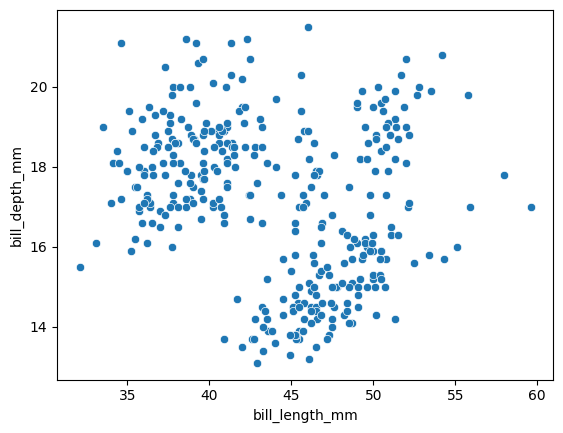

In [35]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm')

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

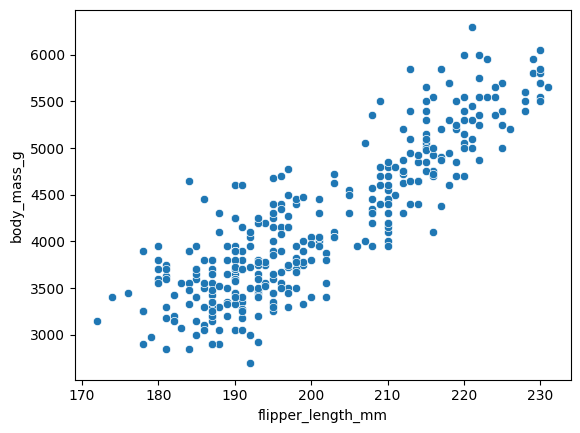

In [36]:
sns.scatterplot(data = penguins, x = 'flipper_length_mm', y = 'body_mass_g')

In [37]:
palette = {'setosa': 'orange', 'versicolor': 'green', 'virginica': 'purple'}

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

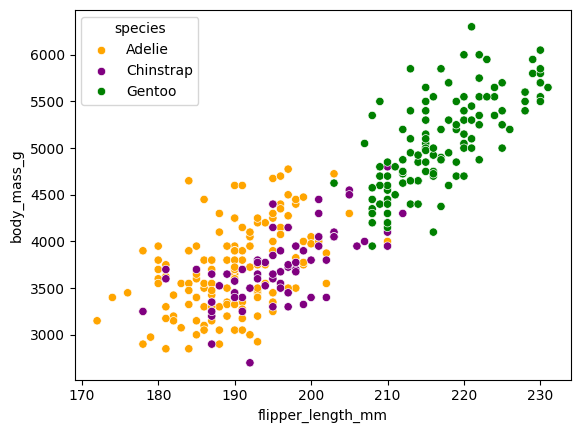

In [38]:
sns.scatterplot(data = penguins, x = 'flipper_length_mm', y = 'body_mass_g', hue = 'species', palette = {"Adelie": "Orange", "Gentoo": "Green", "Chinstrap": "purple"})

Nhận Xét: Chúng ta có thể thấy dữ liệu vùng phân bổ của Gentoo có thể được tách ra tốt vì chúng thường có flipper_length cao (>= 205) trong khi Adelie và Chinstrap(<=205)

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

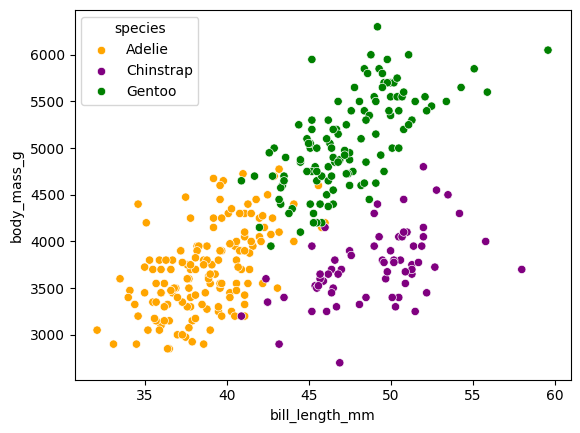

In [39]:
sns.scatterplot(data = penguins, x = 'bill_length_mm', y = 'body_mass_g', hue = 'species', palette = {"Adelie": "Orange", "Gentoo": "Green", "Chinstrap": "purple"})

Nhận Xét: Ở biểu đồ này, ta có thể thấy khá rõ ráng là các dữ liệu khá phân tách nhau dựa trên bill_length và body_mass


In [40]:
X = penguins.drop("species", axis = 1)
le = LabelEncoder()
X = pd.get_dummies(X, drop_first=False)
y = penguins["species"]
y = le.fit_transform(y)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24521532)
y_test

array([1, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2,
       0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 1, 0,
       2, 2, 2, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2,
       1, 1, 0])

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
model = DecisionTreeClassifier(max_depth=4,random_state=24521532)

pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("model", model)
])

Nhận Xét:
- Có thể xử lý thiếu thông tin dữ liệu bằng cách fill những giá trị còn thiếu bằng trung bình giá trị của cột label đó
- Viết pipeline để vừa thực hiện imputer vừa thực hiện model, nó sẽ fill các tất cả các giá trị giá trị NAN bằng trung bình (mean), imputer sẽ tìm ra mean của tập train xong đó fill tất cả chúng, sao đó từ mean đó chúng transform cho tập test mà không làm bị liệu bị leak

In [43]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('model',
                 DecisionTreeClassifier(max_depth=4, random_state=24521532))])

In [44]:
pipeline.fit(X_train,y_train)
y_preds = pipeline.predict(X_test)
print(y_preds)
print(y_test)

[1 0 2 0 2 0 2 2 2 2 0 0 0 0 2 2 0 0 2 2 0 2 0 0 1 2 2 0 2 0 0 0 0 0 2 2 0
 0 2 1 2 0 1 0 2 2 2 1 0 1 2 2 0 0 2 1 1 1 2 0 1 0 0 0 2 2 1 1 0]
[1 0 2 0 2 0 2 2 2 2 0 0 0 0 2 2 0 0 2 2 0 2 0 0 1 2 2 0 2 0 0 0 0 0 2 2 0
 0 2 1 2 0 1 0 2 2 2 1 0 1 2 2 0 0 2 1 1 1 2 0 0 0 0 0 2 2 1 1 0]


In [45]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_preds, y_test))


0.9855072463768116


- Depth = 1, Accuracy = 0.8260869565217391
- Depth = 2, Accuracy = 0.9420289855072463
- Depth = 3, Accuracy = 0.9420289855072463
- Depth = 4, Accuracy = 0.9855072463768116
- Khi cho cây tự xét depth, nó sẽ set depth = 6 và accruacy = 0.9855072463768116
- Depth = 20, Accuracy = 0.9855072463768116
- Nhận xét: Ở Depth = 1, vì cây khá đơn giản nên accuracy khá thấp, cây sẽ hoạt động khá tốt ở depth = 4, khi depth = 20 cây mặc dù bị overitting

In [46]:
tree_model = pipeline.named_steps["model"]

In [47]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(
    tree_model,
    out_file=None,
    feature_names=X_train.columns,   # tên cột (sau khi imputer đã xử lý)
    class_names=tree_model.classes_.astype(str),  # tên class
    filled=True, rounded=True,
    special_characters=True
)

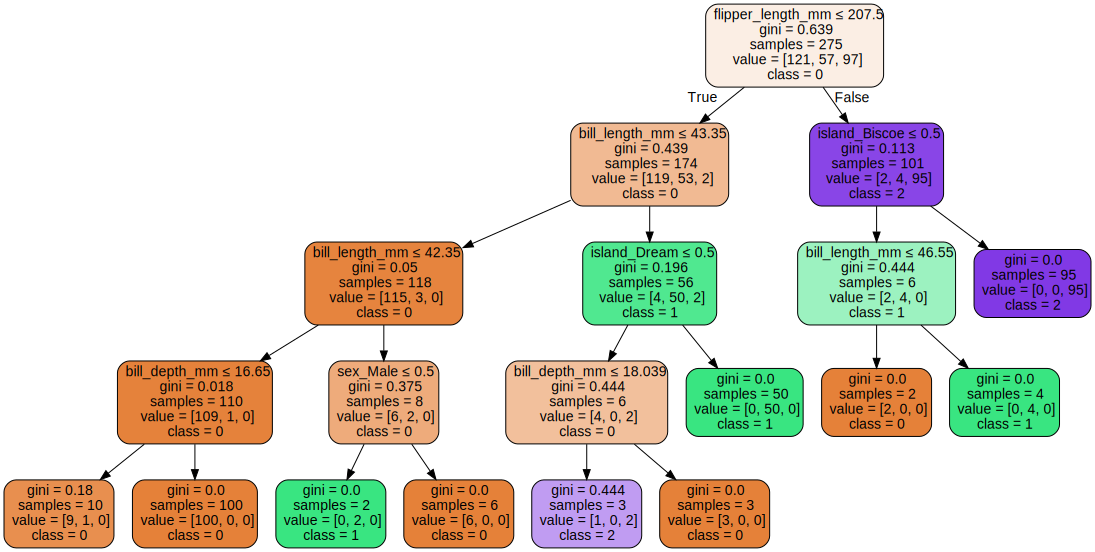

In [48]:
graph = graphviz.Source(dot_data)
graph.render("decision_tree_penguins", format="png", cleanup=True)  # tạo file ảnh PNG
graph